<a href="https://colab.research.google.com/github/Vishal64B/NNDL/blob/main/Vishal_Q2_NNDL_CIA_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION 2: Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)
Task:
• Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).
• Use backpropagation to optimize the model's weights based on error calculation.
• Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
• Evaluate the model on a test set using accuracy and plot the loss over epochs.

In [ ]:
import pandas as pd

df = pd.read_csv('Tweets.csv')

print(df.info())

print(df.describe())

print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

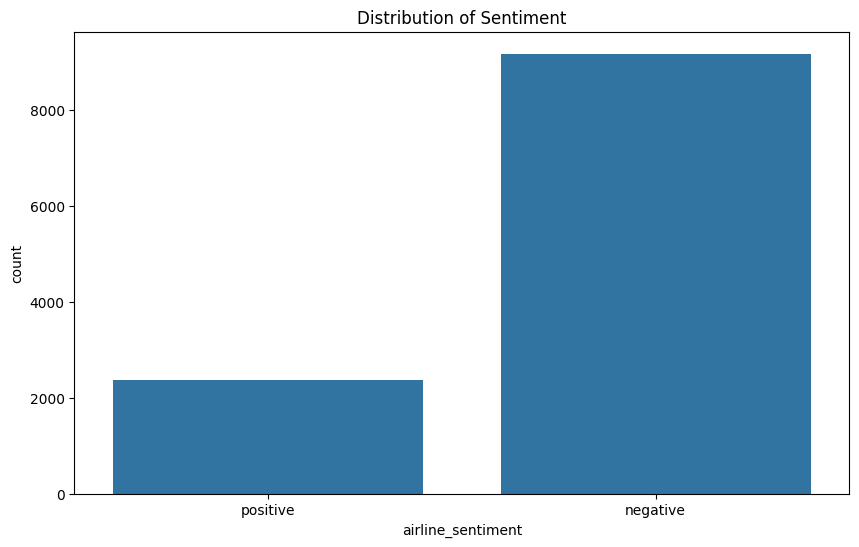

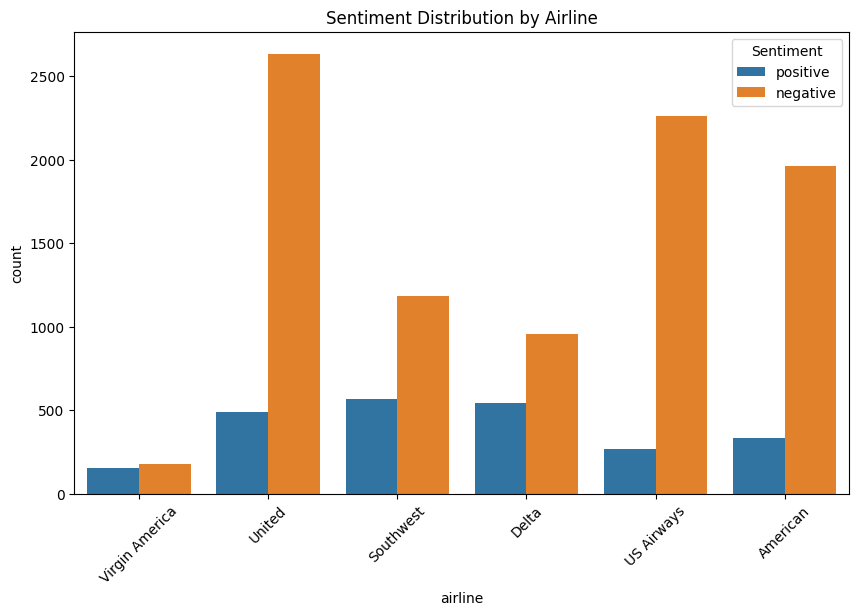

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Relu - Test accuracy: 0.9199
Sigmoid - Test accuracy: 0.9268
Tanh - Test accuracy: 0.9052


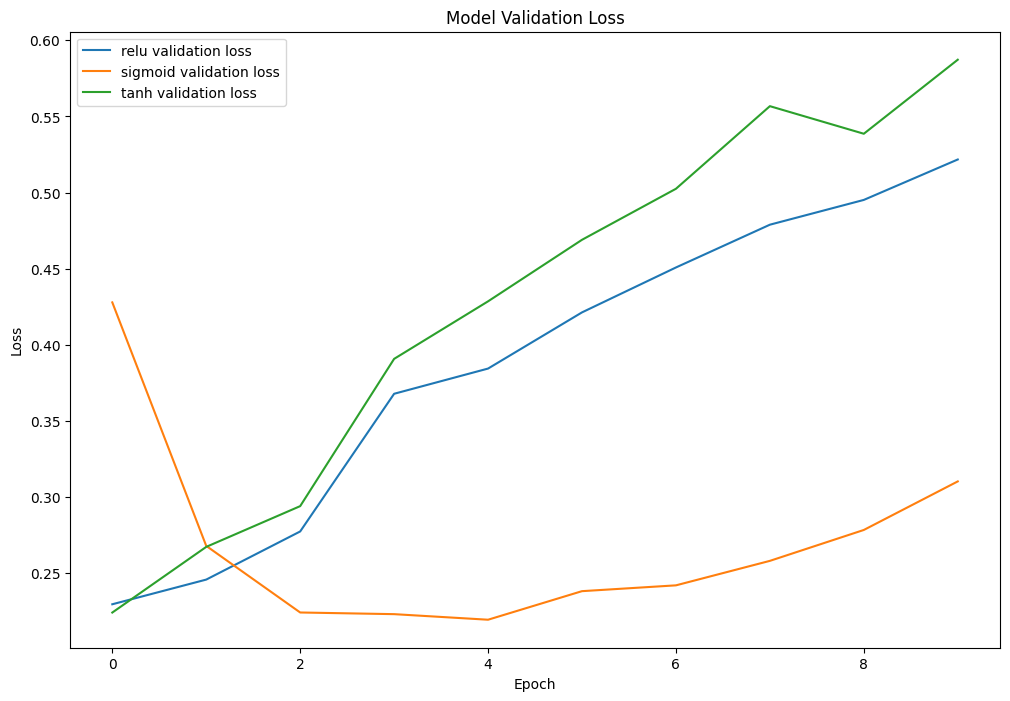

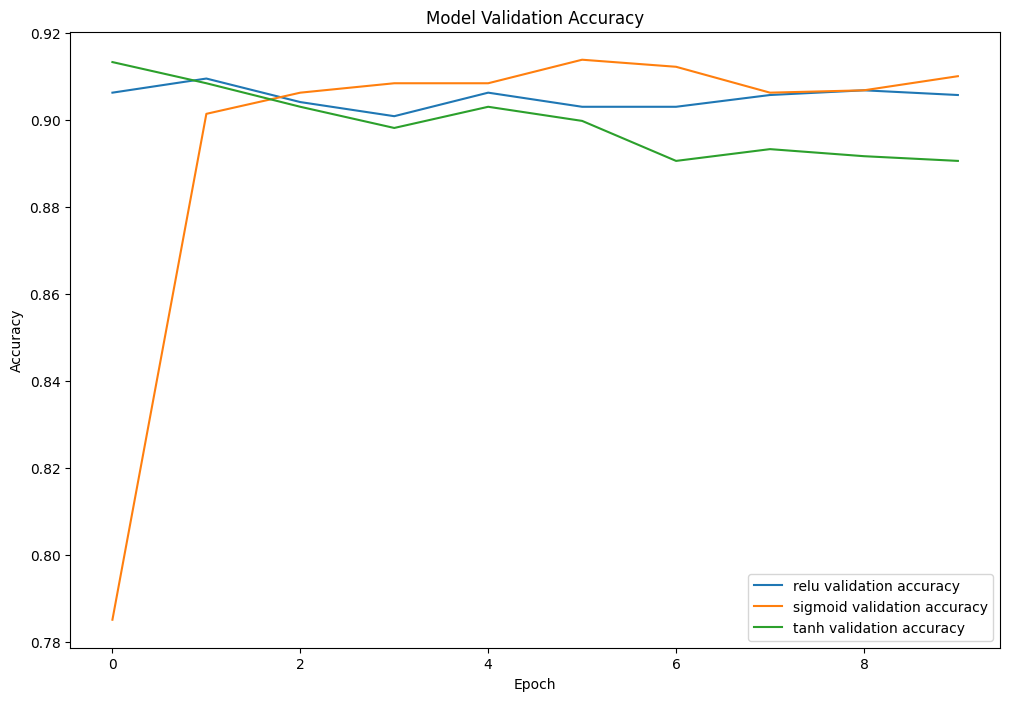

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the data
df = pd.read_csv('Tweets.csv')

# Basic preprocessing
df = df[df['airline_sentiment'] != 'neutral']
df['text'] = df['text'].str.lower()

# Encode sentiment labels
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['airline_sentiment'])

# EDA
plt.figure(figsize=(10, 6))
sns.countplot(x='airline_sentiment', data=df)
plt.title('Distribution of Sentiment')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df)
plt.title('Sentiment Distribution by Airline')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Prepare data for model
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network Model
def create_model(activation='relu'):
    model = Sequential([
        Dense(64, activation=activation, input_shape=(5000,)),
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with different activation functions
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    histories[activation] = history

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{activation.capitalize()} - Test accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 8))
for activation, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{activation} validation loss')
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(12, 8))
for activation, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{activation} validation accuracy')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:

best_activation = max(histories, key=lambda k: histories[k].history['val_accuracy'][-1])
best_model = create_model(best_activation)
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Get feature importance (weights of the input layer)
weights = best_model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(weights), axis=1)

# Map feature importance to words (features from CountVectorizer)
feature_names = vectorizer.get_feature_names_out()
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Display top N important features
top_n = 20
print(f"Top {top_n} most important features for predicting sentiment:")
print(feature_importance_df.head(top_n))


# Find words associated with positive and negative sentiments
positive_tweets = df[df['sentiment'] == 1]['text']
negative_tweets = df[df['sentiment'] == 0]['text']

positive_word_counts = {}
negative_word_counts = {}

for tweet in positive_tweets:
  for word in tweet.split():
    if word not in positive_word_counts:
      positive_word_counts[word] = 0
    positive_word_counts[word] += 1

for tweet in negative_tweets:
  for word in tweet.split():
    if word not in negative_word_counts:
      negative_word_counts[word] = 0
    negative_word_counts[word] += 1

# Sort words by frequency
sorted_positive_words = dict(sorted(positive_word_counts.items(), key=lambda item: item[1], reverse=True))
sorted_negative_words = dict(sorted(negative_word_counts.items(), key=lambda item: item[1], reverse=True))

print("\nTop positive words:")
for word, count in list(sorted_positive_words.items())[:10]:
  print(f"{word}: {count}")

print("\nTop negative words:")
for word, count in list(sorted_negative_words.items())[:10]:
  print(f"{word}: {count}")
